**Importing the Library**

In [214]:
import bs4 as bs
import numpy as np
import pandas as  pd
import nltk
import time
import collections
nltk.download('punkt')
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('inaugural')
from nltk.tokenize import word_tokenize,sent_tokenize 
import urllib.request
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Importing the text data**

In [0]:
text_data = "India will celebrate its 70th Republic Day on January 26 (Saturday). Republic Day is celebrated with great enthusiasm across the country including in every school, college, government and private institutions to honour the Constitution that came to force on January 26 in 1950.The day is a national holiday in India. Several events are organised in different states to mark the day. In schools, colleges and other educational institutions, several cultural programmes, speech recitation, group discussion are organised by students to demonstrate India’s rich heritage and culture."

**Visulaise the text data**

In [216]:
text_data

'India will celebrate its 70th Republic Day on January 26 (Saturday). Republic Day is celebrated with great enthusiasm across the country including in every school, college, government and private institutions to honour the Constitution that came to force on January 26 in 1950.The day is a national holiday in India. Several events are organised in different states to mark the day. In schools, colleges and other educational institutions, several cultural programmes, speech recitation, group discussion are organised by students to demonstrate India’s rich heritage and culture.'

**Function for cleaning the data and removing the stops words**

In [0]:
Replace_by_Space_re = re.compile('[/(){}\[\]\|@,;]')
Bad_Symbols_Re = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def text_prepare(sentances):
  print(sentances)
  #for text in sentances: 
  text_data = text.lower()
  text_data = re.sub(Replace_by_Space_re, ' ', text_data)
  text_data = re.sub(Bad_Symbols_Re,'',text_data)
  text_data = " ".join([word for word in sent_tokenize(text_data) if not word in STOPWORDS]) 
  return text_data

**Call the text prepare function**

In [218]:
text_prepare_sent=text_prepare(text_data)

India will celebrate its 70th Republic Day on January 26 (Saturday). Republic Day is celebrated with great enthusiasm across the country including in every school, college, government and private institutions to honour the Constitution that came to force on January 26 in 1950.The day is a national holiday in India. Several events are organised in different states to mark the day. In schools, colleges and other educational institutions, several cultural programmes, speech recitation, group discussion are organised by students to demonstrate India’s rich heritage and culture.


**Visulaize the text prepare data**

In [219]:
text_prepare_sent

'on august 15 as prime minister narendra modi walked up the ramparts of the red fort to deliver his sixth independence day speech the sky above was overcast however  the imminent threat of rains did not slow down or stop modi  from the word go modi was in full exuberance and had a flourish that is now associated with his oratorymodi packed a lot of thoughts in his 92minutelong speech  the secondlongest by any prime minister  the longest being the 98minute speech modi delivered in 2016 if modis 2018 independence day speech was more of a look back moment  this time he has focused on the road ahead if one were roughly cut his speech  for about 30 minutes modi spoke about what his government had achieved  the remaining part of about an hour was forwardlookingfive minutes into his speech modi stressed that his 10weekold government passed many important legislation and achieved progress across sectors he said that by abrogating article 370 and 35a his government had further realised the drea

In [220]:
word_tokens = nltk.word_tokenize(text_prepare_sent)
print(word_tokens)

['on', 'august', '15', 'as', 'prime', 'minister', 'narendra', 'modi', 'walked', 'up', 'the', 'ramparts', 'of', 'the', 'red', 'fort', 'to', 'deliver', 'his', 'sixth', 'independence', 'day', 'speech', 'the', 'sky', 'above', 'was', 'overcast', 'however', 'the', 'imminent', 'threat', 'of', 'rains', 'did', 'not', 'slow', 'down', 'or', 'stop', 'modi', 'from', 'the', 'word', 'go', 'modi', 'was', 'in', 'full', 'exuberance', 'and', 'had', 'a', 'flourish', 'that', 'is', 'now', 'associated', 'with', 'his', 'oratorymodi', 'packed', 'a', 'lot', 'of', 'thoughts', 'in', 'his', '92minutelong', 'speech', 'the', 'secondlongest', 'by', 'any', 'prime', 'minister', 'the', 'longest', 'being', 'the', '98minute', 'speech', 'modi', 'delivered', 'in', '2016', 'if', 'modis', '2018', 'independence', 'day', 'speech', 'was', 'more', 'of', 'a', 'look', 'back', 'moment', 'this', 'time', 'he', 'has', 'focused', 'on', 'the', 'road', 'ahead', 'if', 'one', 'were', 'roughly', 'cut', 'his', 'speech', 'for', 'about', '30', 

In [221]:
# Dictionary of all words from train corpus with their counts.
words_counts = {}
for word in word_tokens:
  if word in words_counts:
    words_counts[word] = words_counts[word] + 1
  else:
    words_counts[word] = 1 
print(words_counts)

{'on': 16, 'august': 2, '15': 2, 'as': 2, 'prime': 2, 'minister': 4, 'narendra': 1, 'modi': 17, 'walked': 1, 'up': 1, 'the': 59, 'ramparts': 1, 'of': 22, 'red': 1, 'fort': 1, 'to': 25, 'deliver': 1, 'his': 14, 'sixth': 2, 'independence': 2, 'day': 2, 'speech': 8, 'sky': 1, 'above': 1, 'was': 17, 'overcast': 1, 'however': 2, 'imminent': 1, 'threat': 1, 'rains': 1, 'did': 1, 'not': 3, 'slow': 2, 'down': 1, 'or': 8, 'stop': 1, 'from': 4, 'word': 1, 'go': 1, 'in': 23, 'full': 1, 'exuberance': 1, 'and': 30, 'had': 5, 'a': 26, 'flourish': 1, 'that': 20, 'is': 16, 'now': 2, 'associated': 1, 'with': 2, 'oratorymodi': 1, 'packed': 1, 'lot': 1, 'thoughts': 1, '92minutelong': 1, 'secondlongest': 1, 'by': 5, 'any': 5, 'longest': 1, 'being': 2, '98minute': 1, 'delivered': 1, '2016': 1, 'if': 6, 'modis': 3, '2018': 1, 'more': 6, 'look': 2, 'back': 1, 'moment': 1, 'this': 9, 'time': 3, 'he': 15, 'has': 7, 'focused': 2, 'road': 1, 'ahead': 1, 'one': 15, 'were': 3, 'roughly': 1, 'cut': 1, 'for': 20, 'a

**getting the top three most popular word counts**

In [222]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:3]
print(most_common_words)

[('the', 59), ('and', 30), ('a', 26)]


<FreqDist with 461 samples and 1065 outcomes>
[('the', 59), ('and', 30), ('a', 26), ('to', 25), ('in', 23), ('of', 22), ('that', 20), ('for', 20), ('modi', 17), ('was', 17), ('on', 16), ('is', 16), ('he', 15), ('one', 15), ('his', 14), ('said', 13), ('government', 10), ('nation', 10), ('this', 9), ('speech', 8), ('or', 8), ('be', 8), ('has', 7), ('about', 7), ('if', 6)]


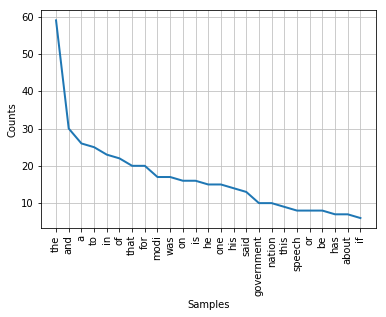

In [223]:

import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(word_tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)


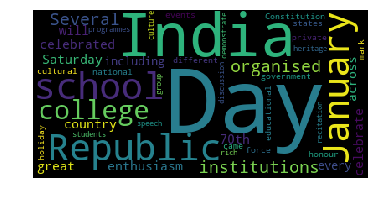

In [224]:
# Building the wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud().generate(text_data)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

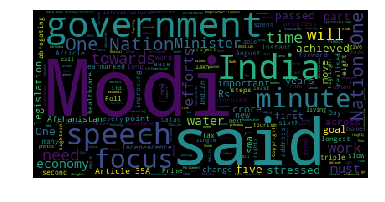

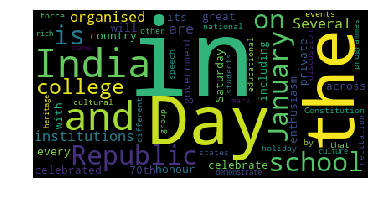

In [225]:
def plot_wordcloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
wordcloud = WordCloud().generate(text)
plot_wordcloud(wordcloud)
wordcloud = WordCloud(stopwords={'to','of'}).generate(text_data)
plot_wordcloud(wordcloud)

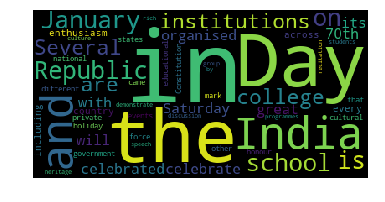

In [226]:
# Building the wordcloud with relative scaling = 0
wordcloud = WordCloud(relative_scaling = 0, stopwords = {'to','of'}).generate(text_data)
plot_wordcloud(wordcloud)

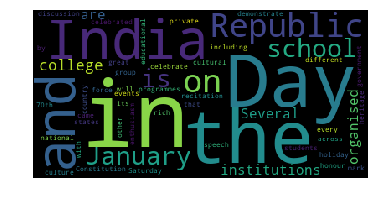

In [227]:
# Building the wordcloud with relative scaling = 1
wordcloud = WordCloud(relative_scaling = 1.0, stopwords = {'to','of'}).generate(text_data)
plot_wordcloud(wordcloud)

**Using [Url](https://www.moneycontrol.com/news/india/independence-day-speech-modi-is-a-man-in-a-hurry-can-india-run-with-him-4338721.html)**

In [0]:
df = urllib.request.urlopen("https://www.moneycontrol.com/news/india/independence-day-speech-modi-is-a-man-in-a-hurry-can-india-run-with-him-4338721.html")

In [0]:
soup = bs.BeautifulSoup(df,'html')
text_data = ""
for paragraph in soup.find_all('p'):
    text_data += paragraph.text

In [230]:
text_prepare_URLresults=text_prepare(text_data)


On August 15 as Prime Minister Narendra Modi walked up the ramparts of the Red Fort to deliver his sixth Independence Day speech the sky above was overcast. However, the imminent threat of rains did not slow down or stop Modi — from the word go Modi was in full exuberance and had a flourish that is now associated with his oratory.Modi packed a lot of thoughts in his 92-minute-long speech — the second-longest by any Prime Minister; the longest being the 98-minute speech Modi delivered in 2016. If Modi’s 2018 Independence Day speech was more of a ‘look back moment’, this time he has focused on the road ahead. If one were roughly cut his speech, for about 30 minutes Modi spoke about what his government had achieved; the remaining part of about an hour was forward-looking.Five minutes into his speech Modi stressed that his 10-week-old government passed many important legislation and achieved progress across sectors. He said that by abrogating Article 370 and 35A his government had further 

In [231]:
text_prepare_URLresults

'on august 15 as prime minister narendra modi walked up the ramparts of the red fort to deliver his sixth independence day speech the sky above was overcast however  the imminent threat of rains did not slow down or stop modi  from the word go modi was in full exuberance and had a flourish that is now associated with his oratorymodi packed a lot of thoughts in his 92minutelong speech  the secondlongest by any prime minister  the longest being the 98minute speech modi delivered in 2016 if modis 2018 independence day speech was more of a look back moment  this time he has focused on the road ahead if one were roughly cut his speech  for about 30 minutes modi spoke about what his government had achieved  the remaining part of about an hour was forwardlookingfive minutes into his speech modi stressed that his 10weekold government passed many important legislation and achieved progress across sectors he said that by abrogating article 370 and 35a his government had further realised the drea

In [232]:
word_tokens = nltk.word_tokenize(text_prepare_URLresults)
print(word_tokens)

['on', 'august', '15', 'as', 'prime', 'minister', 'narendra', 'modi', 'walked', 'up', 'the', 'ramparts', 'of', 'the', 'red', 'fort', 'to', 'deliver', 'his', 'sixth', 'independence', 'day', 'speech', 'the', 'sky', 'above', 'was', 'overcast', 'however', 'the', 'imminent', 'threat', 'of', 'rains', 'did', 'not', 'slow', 'down', 'or', 'stop', 'modi', 'from', 'the', 'word', 'go', 'modi', 'was', 'in', 'full', 'exuberance', 'and', 'had', 'a', 'flourish', 'that', 'is', 'now', 'associated', 'with', 'his', 'oratorymodi', 'packed', 'a', 'lot', 'of', 'thoughts', 'in', 'his', '92minutelong', 'speech', 'the', 'secondlongest', 'by', 'any', 'prime', 'minister', 'the', 'longest', 'being', 'the', '98minute', 'speech', 'modi', 'delivered', 'in', '2016', 'if', 'modis', '2018', 'independence', 'day', 'speech', 'was', 'more', 'of', 'a', 'look', 'back', 'moment', 'this', 'time', 'he', 'has', 'focused', 'on', 'the', 'road', 'ahead', 'if', 'one', 'were', 'roughly', 'cut', 'his', 'speech', 'for', 'about', '30', 

In [233]:
# Dictionary of all words from train corpus with their counts.
words_counts = {}
for word in word_tokens:
  if word in words_counts:
    words_counts[word] = words_counts[word] + 1
  else:
    words_counts[word] = 1 
print(words_counts)

{'on': 16, 'august': 2, '15': 2, 'as': 2, 'prime': 2, 'minister': 4, 'narendra': 1, 'modi': 17, 'walked': 1, 'up': 1, 'the': 59, 'ramparts': 1, 'of': 22, 'red': 1, 'fort': 1, 'to': 25, 'deliver': 1, 'his': 14, 'sixth': 2, 'independence': 2, 'day': 2, 'speech': 8, 'sky': 1, 'above': 1, 'was': 17, 'overcast': 1, 'however': 2, 'imminent': 1, 'threat': 1, 'rains': 1, 'did': 1, 'not': 3, 'slow': 2, 'down': 1, 'or': 8, 'stop': 1, 'from': 4, 'word': 1, 'go': 1, 'in': 23, 'full': 1, 'exuberance': 1, 'and': 30, 'had': 5, 'a': 26, 'flourish': 1, 'that': 20, 'is': 16, 'now': 2, 'associated': 1, 'with': 2, 'oratorymodi': 1, 'packed': 1, 'lot': 1, 'thoughts': 1, '92minutelong': 1, 'secondlongest': 1, 'by': 5, 'any': 5, 'longest': 1, 'being': 2, '98minute': 1, 'delivered': 1, '2016': 1, 'if': 6, 'modis': 3, '2018': 1, 'more': 6, 'look': 2, 'back': 1, 'moment': 1, 'this': 9, 'time': 3, 'he': 15, 'has': 7, 'focused': 2, 'road': 1, 'ahead': 1, 'one': 15, 'were': 3, 'roughly': 1, 'cut': 1, 'for': 20, 'a

In [234]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:3]
print(most_common_words)

[('the', 59), ('and', 30), ('a', 26)]


<FreqDist with 461 samples and 1065 outcomes>
[('the', 59), ('and', 30), ('a', 26), ('to', 25), ('in', 23), ('of', 22), ('that', 20), ('for', 20), ('modi', 17), ('was', 17), ('on', 16), ('is', 16), ('he', 15), ('one', 15), ('his', 14), ('said', 13), ('government', 10), ('nation', 10), ('this', 9), ('speech', 8), ('or', 8), ('be', 8), ('has', 7), ('about', 7), ('if', 6)]


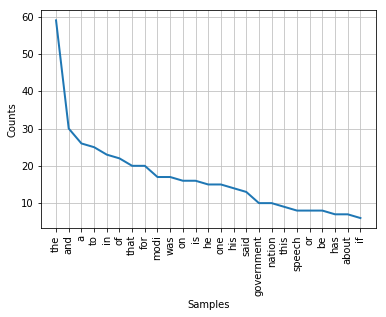

In [235]:
import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(word_tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

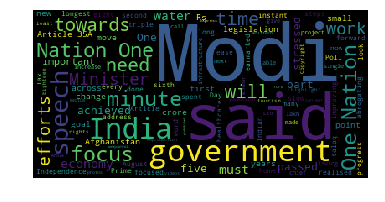

In [236]:
# Building the wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud().generate(text_data)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

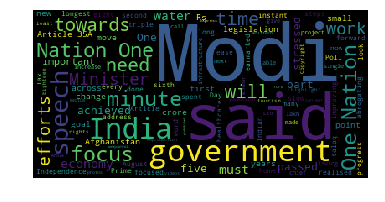

In [237]:
plot_wordcloud(wordcloud)

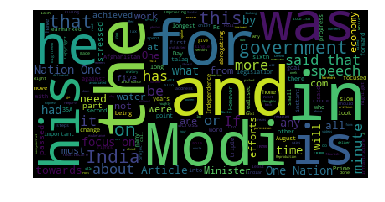

In [238]:
# Building the wordcloud with relative scaling = 0
wordcloud = WordCloud(relative_scaling = 0, stopwords = {'to','of'}).generate(text_data)
plot_wordcloud(wordcloud)

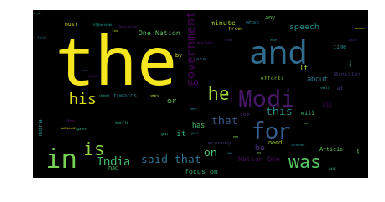

In [239]:
# Building the wordcloud with relative scaling = 1
wordcloud = WordCloud(relative_scaling = 1.0, stopwords = {'to','of'}).generate(text_data)
plot_wordcloud(wordcloud)